#  Seaborn 简明教程    
seaborn是一个常见的用于绘图的python模块，相比较于matplotlib，它使得绘制较为复杂的图更加容易，并且不需要什么设置就能绘制出更为美观的图。也就是其官方语*make a well-defined set of hard things easy*，本质上，它就是matplotlib的高阶接口。  
下面简单用一下seaborn来学习一下。大部分内容来自[原教程](https://elitedatascience.com/python-seaborn-tutorial?spm=5176.100239.blogcont129749.13.8a8HJO)  
## 模块引用和数据集读取
这里我们需要用到几个模块来练习，它们分别是：  
1. pandas  
2. matplotlib  
3. seaborn  
这里安装就不赘述了，Anconda和pip都可以安装。  
我们用到的数据集是一个[宠物小精灵数据集](https://elitedatascience.com/wp-content/uploads/2017/04/Pokemon.csv)。

In [15]:
# import所需库
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
# 查看数据格式  
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='cp1252')
df.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
#                                                                            
1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
2     Ivysaur  Grass  Poison    405  60      62       63       80       80   
3    Venusaur  Grass  Poison    525  80      82       83      100      100   
4  Charmander   Fire     NaN    309  39      52       43       60       50   
5  Charmeleon   Fire     NaN    405  58      64       58       80       65   

   Speed  Stage  Legendary  
#                           
1     45      1      False  
2     60      2      False  
3     80      3      False  
4     65      1      False  
5     80      2      False

## 简单绘图    
下面我们利用seaborn的的lmplot函数来绘制最基本的散点图。下面给出了两种方式，我们可以将数据集传进去，并给出x和y轴的字段，我们也可以单独给x和y传入数据。不过前者的方式更为推荐，因为不会出现x和y长度不一的情况。    

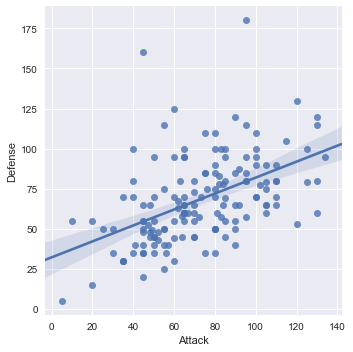

In [18]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

这里我们可以看到，这张图中自动生成了一条拟合直线，但是这在我们的数据集中没有意义。同时我们想根据宠物小精灵的阶段('Stage'字段)给散点染色，这时只要简单的设置两个参数如下：  

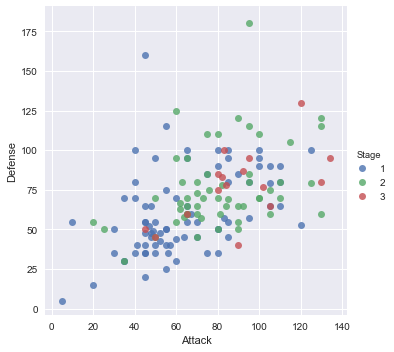

In [19]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')   

## 利用matplotlib调整图形  
前面说过了，seaborn是matplotlib的高阶接口，也就是我们利用seaborn生成的图表也能用matplotlib进行调整。例如，我们可以看到上图x/y轴的起点都不是0，而我们的数值（攻击力和防御力）必然都是非负的，同时我们又想给这张表加个标题。这时我们就可以利用matplotlib来做相应调整。  

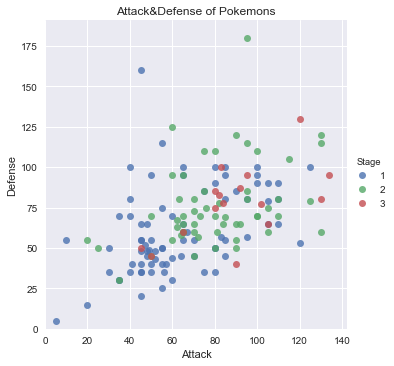

In [23]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)
plt.title('Attack&Defense of Pokemons')

## 加上pandas更好用  
我们知道pandas是一个炒鸡好用的处理数据的模块，在用seaborn绘图时，我们加上pandas能够事半功倍。    
例如我们想绘制一个箱式图，seaborn的默认图是这样的：  

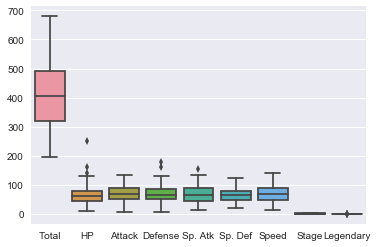

In [24]:
sns.boxplot(data=df)

虽然能看出来些东西，但是显然*Total*，*Stage*和*Legendary*字段都没有意义，因此这里可以用pandas的DataFrame来进行取舍。 

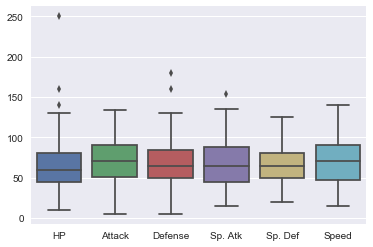

In [25]:
# 创建新的DataFrame，舍去无用字段
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)

## 淡妆浓抹  主题和颜色     
为了使图表更加美观，seaborn提供了5种内置的主题，分别是`darkgrid`, `whitegrid`,`dark`,`white`和`ticks`。通过`set_style`函数就可以设置。
你也可以设置自定义颜色，包括自定义循环色，渐变色等，具体可以参见[文档](https://seaborn.pydata.org/tutorial/color_palettes.html)


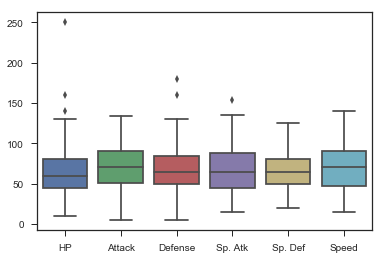

In [28]:
sns.set_style('ticks')
sns.boxplot(data=stats_df)

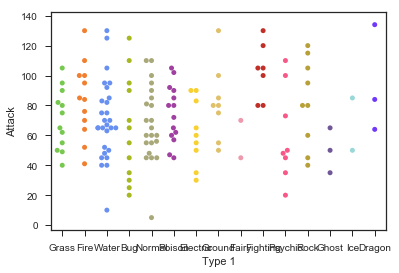

In [31]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# 带密度分布的散点图
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

## 融合 melt  
上面我们已经将攻击力的带分布散点图画出来了，当然我们可以为其他特征各画一幅图，但是更好的做法是将其融合起来。我们用pandas的`melt`函数，它需要三个参数：需要融合的DataFrame，保留的变量（这些特征不会被融合，而其他的都会被融合），最后融合变量的名字。我们以妙蛙种子为例：

In [44]:
# 融合前，妙蛙种子只有一行数据，包含了所有特征
print('Before melting')
print(stats_df[stats_df['Name'] == 'Bulbasaur'])
# 我们进行融合，保留Type1/2和Name
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], 
                    var_name="Stat") 
print('\n\nAfter melting')
# 融合后，妙蛙种子有6行数据，分别包含了除了Name,Type1/2以外的特征
print(melted_df[melted_df['Name'] == 'Bulbasaur'])


Before melting
        Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
#                                                                        
1  Bulbasaur  Grass  Poison  45      49       49       65       65     45


After melting
          Name Type 1  Type 2     Stat  value
0    Bulbasaur  Grass  Poison       HP     45
151  Bulbasaur  Grass  Poison   Attack     49
302  Bulbasaur  Grass  Poison  Defense     49
453  Bulbasaur  Grass  Poison  Sp. Atk     65
604  Bulbasaur  Grass  Poison  Sp. Def     65
755  Bulbasaur  Grass  Poison    Speed     45


接下来我们就来绘制所有特征散点图融合的图表：  


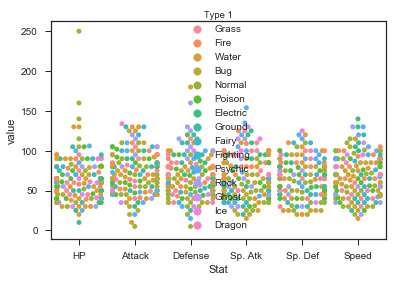

In [46]:
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

这样一看，明显图比较杂乱，我们再做一些改进： 

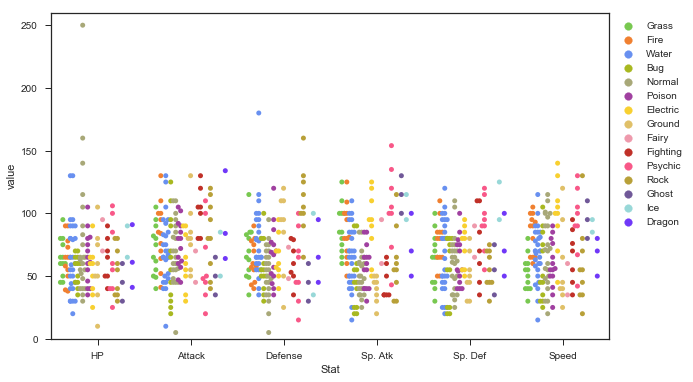

In [47]:
# 1. 把图放大一些，长10inches，高6inches
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. 将不同的type的数据点分开
              palette=pkmn_type_colors) # 3. 是由之前的自定义调色盘
 
# 4. y轴放长一点更显美观
plt.ylim(0, 260)
 
# 5. 图例放到右边去
plt.legend(bbox_to_anchor=(1, 1), loc=2)

## 各类其他图表   
### 相关性热力图 

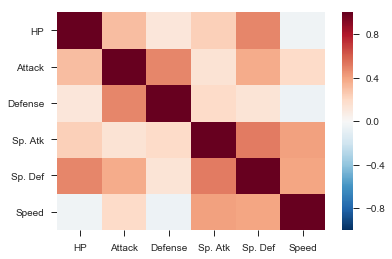

In [50]:
# 计算相关性
corr = stats_df.corr()
 
# 热力图
sns.heatmap(corr)

## 直方图

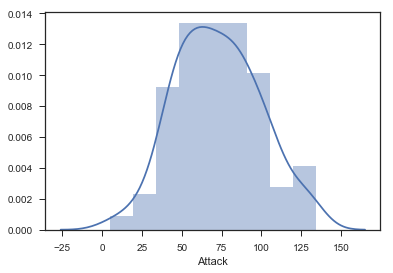

In [51]:
# 攻击力分布图
sns.distplot(df.Attack)

## 柱状图

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

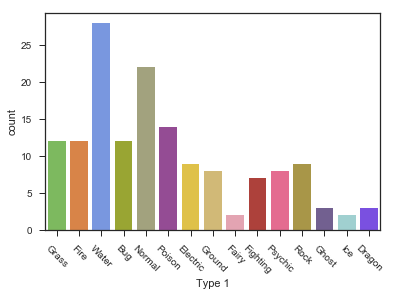

In [52]:
# 计数柱状图
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# x轴倾斜
plt.xticks(rotation=-45)

## 因子图  
利用因子图，我们可以很容易的将不同的类别的数据的图分割开来。  

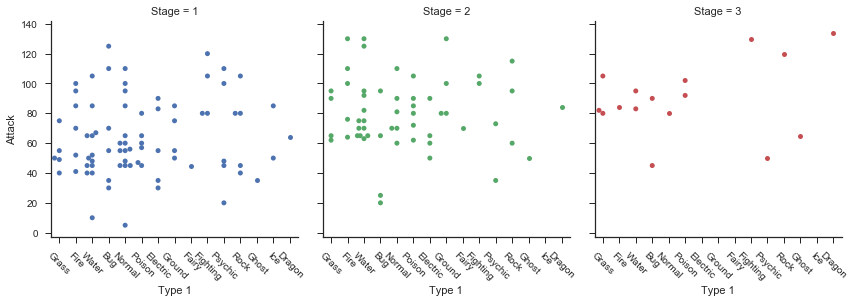

In [53]:
# 因子图
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
g.set_xticklabels(rotation=-45)
 

## 密度图  

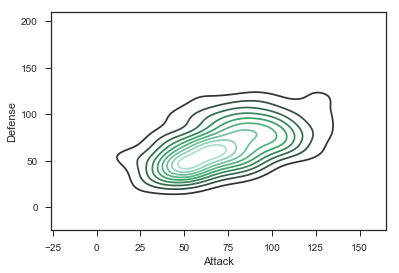

In [54]:
sns.kdeplot(df.Attack, df.Defense)

## 联合分布图

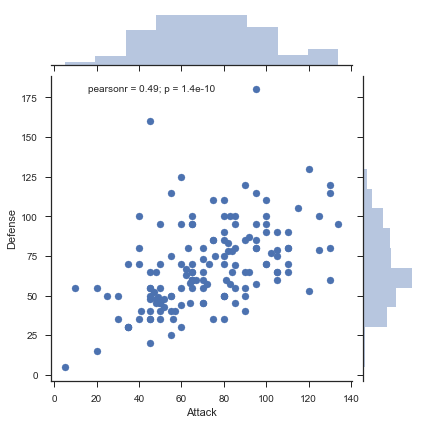

In [55]:
sns.jointplot(x='Attack', y='Defense', data=df)

好了，就先学这么多了，更加细枝末节的东西等到要用到了再去翻文档好了。